In [ ]:
#@title Hello Everyone Welcome in Stock Market, This is a Stock Price Prediction Machine Learning Model only .....    {run: "auto" }  
#@title Please run the cell   {run: "auto" } 
!pip install sequential
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
#@title Please Enter the Company quoto from Yahoo Finance  {run: "auto" }
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')   
Yahoo_finance_Company_Quoto = "SBIN.NS" #@param ["AAPL", "SBIN.NS", "TCS.NS", "TTM", "MSFT", "AMZN", "TSLA"] {allow-input: true}

In [18]:
#@title  {run: "auto" }
Yesterday_date = '2022-12-01' #@param{type:"date"}
Today_date = '2022-12-09' #@param{type:"date"}
from keras.backend import transpose
#Get stock quote
df = web.DataReader(Yahoo_finance_Company_Quoto, data_source='yahoo', start='2011-01-01', end=Yesterday_date)
#show the data
print("The historical data of ", Yahoo_finance_Company_Quoto, "is ......")
df

The historical data of  SBIN.NS is ......


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,285.200012,281.515015,283.269989,282.209991,11060070.0,249.201843
2011-01-04,283.440002,272.714996,283.440002,273.559998,31035310.0,241.563583
2011-01-05,273.640015,268.200012,273.500000,269.320007,25213120.0,237.819504
2011-01-06,271.399994,261.309998,271.399994,262.239990,37167080.0,231.567627
2011-01-07,264.200012,256.714996,261.790009,260.095001,44430600.0,229.673477
...,...,...,...,...,...,...
2022-11-28,610.900024,602.349976,605.599976,608.599976,7934274.0,608.599976
2022-11-29,611.799988,607.099976,607.099976,608.549988,6942919.0,608.549988
2022-11-30,611.400024,598.400024,608.500000,602.450012,15606230.0,602.450012


The Graphical representation of the historical data is .....


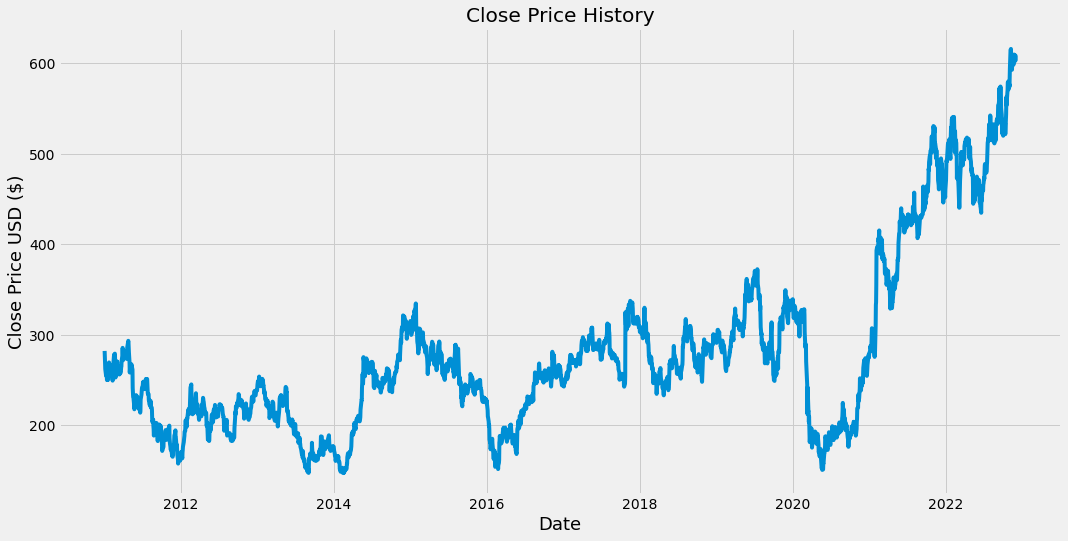

In [19]:
#@title Please run the cell  {run: "auto" }
#get the number of rows and columns in data set
df.shape
print("The Graphical representation of the historical data is .....")
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()


In [20]:
#@title Please run the cell and wait till the model is trained  {run: "auto" }
#create a new data
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)

#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

from os import X_OK
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

 #Convert x_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=2)

#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data in numpy array
x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 
print("The model is trained.")

Epoch 1/2
2292/2292 [==============================] - 68s 28ms/step - loss: 7.0940e-04
Epoch 2/2
2292/2292 [==============================] - 65s 29ms/step - loss: 3.0678e-04
The model is trained.


In [21]:
#@title Please run the cell and wait the model prediction is trained  {run: "auto" }
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print("the model prediction is trained.")
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The Root mean square value(RMSE) is : " )
rmse


19/19 [==============================] - 1s 17ms/step
the model prediction is trained.
The Root mean square value(RMSE) is : 


1.4646687288300548

<ipython-input-22-8c3be423bea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


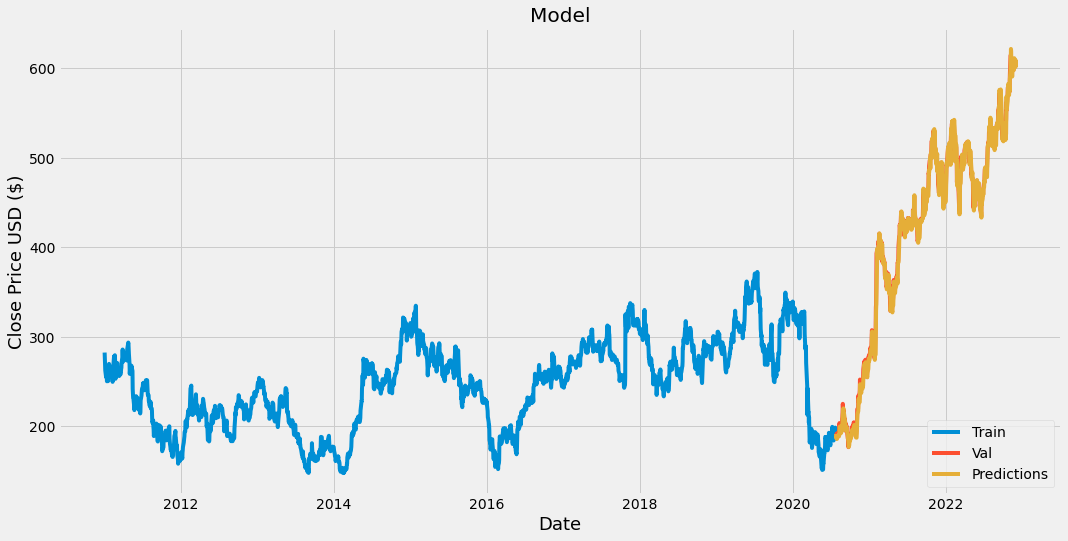

In [22]:
#@title If RMSE value is grater than 5 then Please rerun the cells from model training cell to get best Predictions  {run: "auto" }
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
#@title The Predicton of alredy existing data is ...  {run: "auto" }
print(valid)

apple_quote = web.DataReader(Yahoo_finance_Company_Quoto,data_source='yahoo',start='2012-01-01', end = Yesterday_date)
Price_type = "Open" #@param['Open','Close','High','Low','Adj Close','Volume']
new_df = apple_quote.filter([Price_type])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1)) 
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("\nThe highest Predcition of ",Price_type," price from the all above dates is ......")
print(pred_price)

                 Close  Predictions
Date                               
2020-07-27  187.149994   191.071442
2020-07-28  189.449997   186.361679
2020-07-29  191.199997   186.568863
2020-07-30  186.550003   188.210861
2020-07-31  191.449997   185.529251
...                ...          ...
2022-11-28  608.599976   607.901367
2022-11-29  608.549988   609.554810
2022-11-30  602.450012   609.483154
2022-12-01  608.099976   601.619995
2022-12-02  607.549988   609.902100

[587 rows x 2 columns]
1/1 [==============================] - 0s 26ms/step

The highest Predcition of  Open  price from the all above dates is ......
[[608.2092]]


In [24]:
#@title Todays Price prediction is .. {run: "auto" }
apple_quote2 = web.DataReader(Yahoo_finance_Company_Quoto,data_source='yahoo',start=Yesterday_date, end = Today_date)
Price_type = "Open" #@param['Open','Close','High','Low','Adj Close','Volume']
print(apple_quote2[Price_type])

Date
2022-12-01    607.849976
2022-12-02    607.500000
2022-12-05    608.500000
2022-12-06    614.750000
2022-12-07    610.849976
2022-12-08    609.750000
2022-12-09    614.400024
Name: Open, dtype: float64
